# 5. Recurrent Structures in Neural Networks

Recurrence is not a new phenomenan


In [45]:
'''Trains a simple RNN-LSTM on sine waveform data.
'''
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import seed, random
%matplotlib inline

np.random.seed(1337)  # for reproducibility

# Simulate data
dates = pd.date_range(start='2009-01-01', end='2015-12-31', freq='D')
n = len(dates)
a = np.sin(np.arange(n) * 2 * np.pi / 7)
pdata = pd.DataFrame({"weather":a}, index=dates)
data = pdata
pdata.head()
nout = 10
ninp = 100

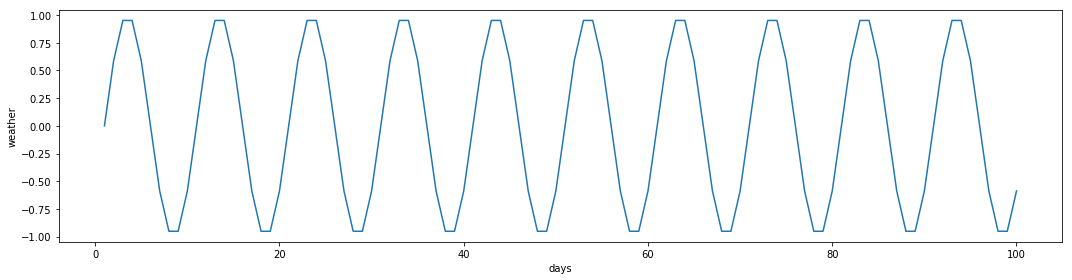

In [33]:
# visualize data
n_plot = 100
plt.figure(figsize=(15,4))
plt.plot(range(1, n_plot+1), data.weather[:n_plot])
plt.xlabel('days')
plt.ylabel('weather')
plt.tight_layout()
plt.show()


In [48]:
def _load_data(data, n_prev = ninp+nout-1):
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev-nout+1].values)
        docY.append(data.iloc[i+n_prev-nout+1:i+n_prev+1].values)
    matX = np.array(docX)
    matY = np.array(docY)

    return matX, matY

def train_test_split(df, test_size=0.1):  
    """
    This just splits data to training and testing parts
    """
    ntrn = int(round(len(df) * (1 - test_size)))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])
    return (X_train, y_train), (X_test, y_test)

# retrieve data
(X_train, y_train), (X_test, y_test) = train_test_split(data)

In [55]:
y_test=np.squeeze(y_test)
y_train=np.squeeze(y_train)
print (X_train.shape,y_train.shape)

(2191, 100, 1) (2191, 10)


In [56]:
# define model structure
in_neurons = 1
out_neurons=10
hidden_neurons = 300
model = Sequential()
model.add(LSTM(input_dim=in_neurons, output_dim=hidden_neurons, return_sequences=False))
model.add(Dense(output_dim=out_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="rmsprop")

/home/jaley/anaconda3/envs/tensorflow-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/home/jaley/anaconda3/envs/tensorflow-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, input_shape=(None, 1), units=300)`
  
/home/jaley/anaconda3/envs/tensorflow-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10)`
  import sys


In [57]:
# and now train the model
# batch_size should be appropriate to your memory size
# number of epochs should be higher for real world problems
model.fit(X_train, y_train, batch_size=50, nb_epoch=10, validation_split=0.05)

/home/jaley/anaconda3/envs/tensorflow-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 2081 samples, validate on 110 samples
Epoch 1/10
2081/2081 [==============================] - 12s 6ms/step - loss: 0.1185 - val_loss: 0.0235
Epoch 2/10
2081/2081 [==============================] - 11s 5ms/step - loss: 0.0170 - val_loss: 0.0386
Epoch 3/10
2081/2081 [==============================] - 11s 5ms/step - loss: 0.0121 - val_loss: 0.0106
Epoch 4/10
2081/2081 [==============================] - 11s 5ms/step - loss: 0.0087 - val_loss: 0.0034
Epoch 5/10
2081/2081 [==============================] - 11s 5ms/step - loss: 0.0065 - val_loss: 0.0034
Epoch 6/10
2081/2081 [==============================] - 13s 6ms/step - loss: 0.0054 - val_loss: 0.0041
Epoch 7/10
2081/2081 [==============================] - 32s 15ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 8/10
2081/2081 [==============================] - 28s 13ms/step - loss: 0.0041 - val_loss: 0.0020
Epoch 9/10
2081/2081 [==============================] - 12s 6ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 10/10
2081/2081 [=

In [58]:
# evaluate model fit
score = model.evaluate(X_test, y_test)
print('Test score:', score)

147/147 [==============================] - 0s 2ms/step
Test score: 0.003782557296649027


Text(0.5,1,'Test Actual Value and Prediction')

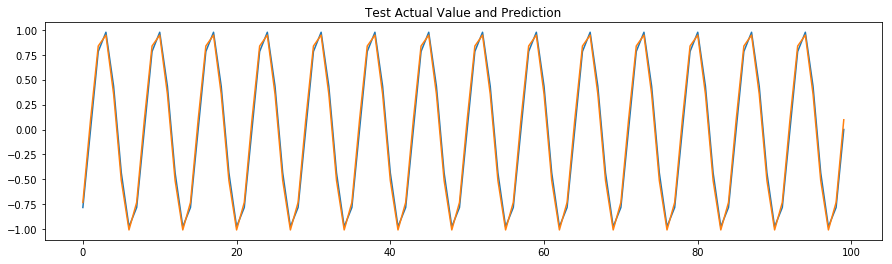

In [59]:
# visualize predictions
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

plt.figure(5, figsize=(15,4))
plt.plot(a[(len(a) - n_plot):len(a)])
plt.plot(test_prediction[:n_plot,0])
plt.title('Test Actual Value and Prediction')

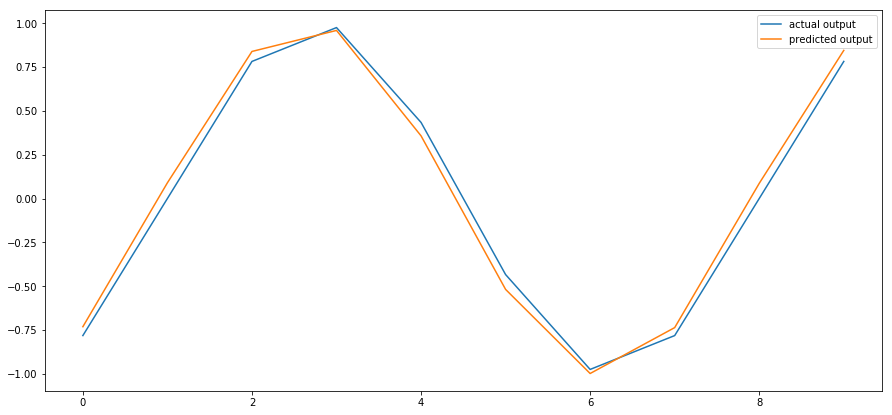

In [71]:
plt.figure(figsize=(15,7))
plt.plot(y_test[0,:],label='actual output')
plt.plot(test_prediction[0,:],label='predicted output')
plt.legend(loc='upper right')
